In [1]:
import yfinance as yf
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aapl_data = yf.download("AAPL", period="max") #downloading the historical data

[*********************100%***********************]  1 of 1 completed


In [3]:
print(aapl_data.columns)


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [4]:
aapl_data.reset_index(inplace = True)

In [5]:
aapl_data.sort_values(by = "Date", ascending = False, inplace = True)

In [6]:
aapl_data.isnull().sum()  #insure there is no nulls 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
aapl_data.info()   #insure data types consistency 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 10833 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10834 non-null  datetime64[ns]
 1   Open       10834 non-null  float64       
 2   High       10834 non-null  float64       
 3   Low        10834 non-null  float64       
 4   Close      10834 non-null  float64       
 5   Adj Close  10834 non-null  float64       
 6   Volume     10834 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 677.1 KB


In [8]:
aapl_data

,Date,Open,High,Low,Close,Adj Close,Volume
10833,2023-12-01,190.330002,191.554993,189.229996,191.240005,191.240005,44867786
10832,2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48715100
10831,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200
10830,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
10829,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
...,...,...,...,...,...,...,...
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800


In [10]:
aapl_data['Daily Return'] = aapl_data['Adj Close'].pct_change() * 100

In [11]:
trials = len(aapl_data)  # Number of days
success_prob = aapl_data['Daily Return'].gt(0).sum() / len(aapl_data)

In [12]:
print(trials, success_prob)

10830 0.46814404432132967


In [23]:
upward_prob = binom.pmf(range(1, trials + 1), trials, success_prob)
downward_prob = 1 - upward_prob

In [19]:
print("Probability of upward movement:", upward_prob)


Probability of upward movement: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


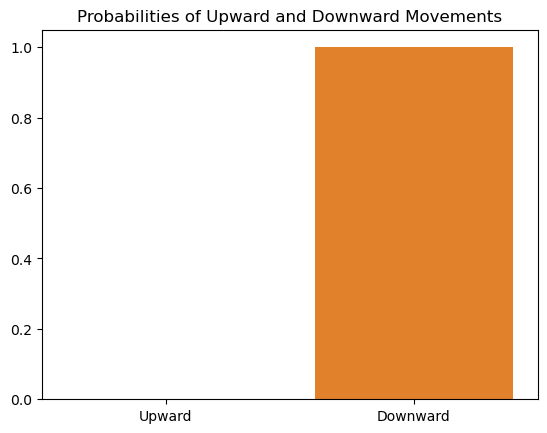

In [18]:


# Plot daily returns
# plt.figure(figsize=(12, 6))
# plt.plot(aapl_data['Date'], aapl_data['Daily Return'])
# plt.xlabel('Date')
# plt.ylabel('Daily Return (%)')
# plt.title('Daily Returns of AAPL Stock Price')
# plt.grid(True)
# plt.show()

# Plot probabilities
sns.barplot(x=['Upward', 'Downward'], y=[upward_prob[-1], downward_prob[-1]])
plt.title('Probabilities of Upward and Downward Movements')
plt.show()